In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./consommation-annuelle-entreprise-par-adresse.csv", sep=';')

In [3]:
df.head()

,Année,Code IRIS,Nom IRIS,Numéro de voie,Indice de répétition,Type de voie,Libellé de voie,Secteur d'activité,Catégorie de consommation,NAF2,Adresse,Code Commune,Nom Commune,Nombre de sites,Consommation annuelle totale de l'adresse (MWh),Code EPCI,Code Département,Code Région,Tri des adresses
0,2018,315555001,Zones d'Activites Sud,41,NaN,BOULEVARD,DE THIBAULT,TERTIAIRE,ENT,NaN,41 BOULEVARD DE THIBAULT,31555,Toulouse,1,39.460,243100518.0,31.0,76.0,797105
1,2022,732570000,Les Belleville (commune non irisée),NaN,NaN,NaN,R U E D U S L A L O M,TERTIAIRE,ENT,82.0,R U E D U S L A L O M,73257,Les Belleville,1,8.792,200023299.0,73.0,84.0,210970
2,2022,786500104,Lac Inférieur,2,NaN,RUE,DE VERDUN,INDUSTRIE,ENT,41.0,2 RUE DE VERDUN,78650,Le Vésinet,1,32.245,200058519.0,78.0,11.0,209056
3,2022,322080000,Lectoure (commune non irisée),NaN,NaN,NaN,P L A C E B O U E L A P E Y R E R E,TERTIAIRE,ENT,70.0,P L A C E B O U E L A P E Y R E R E,32208,Lectoure,1,991.445,243200391.0,32.0,76.0,209161
4,2022,593390101,Centre,NaN,NaN,RUE,LEON GAMBETTA,TERTIAIRE,ENT,88.0,RUE LEON GAMBETTA,59339,Leers,1,152.932,200093201.0,59.0,32.0,209242


In [4]:
df.dtypes

Année                                                int64
Code IRIS                                           object
Nom IRIS                                            object
Numéro de voie                                      object
Indice de répétition                                object
Type de voie                                        object
Libellé de voie                                     object
Secteur d'activité                                  object
Catégorie de consommation                           object
NAF2                                               float64
Adresse                                             object
Code Commune                                         int64
Nom Commune                                         object
Nombre de sites                                      int64
Consommation annuelle totale de l'adresse (MWh)    float64
Code EPCI                                          float64
Code Département                                   float

In [11]:
len(df)

2289296

In [5]:
df["Année"].describe().astype(int)

count    2289296
mean        2021
std            1
min         2018
25%         2020
50%         2022
75%         2023
max         2024
Name: Année, dtype: int64

In [6]:
df["Secteur d\'activité"].value_counts()

Secteur d'activité
TERTIAIRE      1753884
INDUSTRIE       429996
AGRICULTURE     102300
INCONNU           3116
Name: count, dtype: int64

In [7]:
df["Catégorie de consommation"].describe()

count     2289296
unique          1
top           ENT
freq      2289296
Name: Catégorie de consommation, dtype: object

In [8]:
df["Nombre de sites"].describe().astype(int)

count    2289296
mean           1
std            0
min            1
25%            1
50%            1
75%            1
max           60
Name: Nombre de sites, dtype: int64

Note: NAF2: "Nomenclature d'activités française" (French classification of activities): https://www.insee.fr/fr/information/2120875

In [10]:
df["NAF2"].describe().astype(int)

count    1685191
mean          55
std           25
min            1
25%           43
50%           56
75%           84
max           99
Name: NAF2, dtype: int64

In [12]:
df["NAF2"].value_counts()

NAF2
84.0    250006
68.0    153657
47.0    116929
1.0      87048
56.0     83009
         ...  
19.0       167
9.0         62
7.0         43
12.0        12
5.0          6
Name: count, Length: 88, dtype: int64

In [14]:
df["Consommation annuelle totale de l\'adresse (MWh)"].describe().astype(int)

count    2289296
mean         287
std         1513
min            0
25%           37
50%           79
75%          179
max       284488
Name: Consommation annuelle totale de l'adresse (MWh), dtype: int64

In [15]:
sum(df["Consommation annuelle totale de l\'adresse (MWh)"])

657112870.7179761

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2289296 entries, 0 to 2289295
Data columns (total 19 columns):
 #   Column                                           Dtype  
---  ------                                           -----  
 0   Année                                            int64  
 1   Code IRIS                                        object 
 2   Nom IRIS                                         object 
 3   Numéro de voie                                   object 
 4   Indice de répétition                             object 
 5   Type de voie                                     object 
 6   Libellé de voie                                  object 
 7   Secteur d'activité                               object 
 8   Catégorie de consommation                        object 
 9   NAF2                                             float64
 10  Adresse                                          object 
 11  Code Commune                                     int64  
 12  Nom Commune   

In [18]:
df.shape

(2289296, 19)

In [19]:
df.groupby("Secteur d\'activité")["Consommation annuelle totale de l\'adresse (MWh)"].mean()

Secteur d'activité
AGRICULTURE    116.650814
INCONNU        195.800376
INDUSTRIE      561.871908
TERTIAIRE      229.756760
Name: Consommation annuelle totale de l'adresse (MWh), dtype: float64

In [21]:
df.groupby(["Secteur d\'activité", "Année"])["Consommation annuelle totale de l\'adresse (MWh)"].mean()

Secteur d'activité  Année
AGRICULTURE         2018      132.516044
                    2019      121.675946
                    2020      127.430675
                    2021      116.454079
                    2022      124.618100
                    2023      111.476675
                    2024      108.968631
INCONNU             2018     1188.183241
                    2019      659.878175
                    2020      123.348401
                    2021      135.813204
                    2022       43.211308
                    2023       39.477077
                    2024       40.219742
INDUSTRIE           2018      489.068568
                    2019      460.530234
                    2020      448.836801
                    2021      433.875081
                    2022      651.672234
                    2023      615.393109
                    2024      592.197497
TERTIAIRE           2018      250.539014
                    2019      243.645180
                    2020      2

<AxesSubplot: xlabel='Année'>

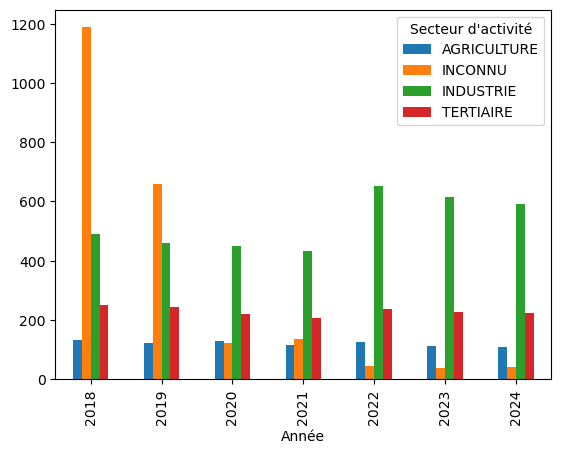

In [47]:
df.groupby(["Secteur d\'activité", "Année"])["Consommation annuelle totale de l\'adresse (MWh)"].mean().unstack("Secteur d'activité").plot(kind="bar")

<AxesSubplot: xlabel='Année'>

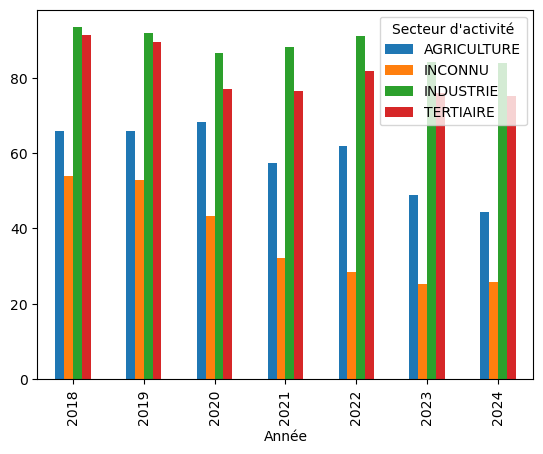

In [49]:
df.groupby(["Secteur d\'activité", "Année"])["Consommation annuelle totale de l\'adresse (MWh)"].median().unstack("Secteur d'activité").plot(kind="bar")

<AxesSubplot: xlabel='Année'>

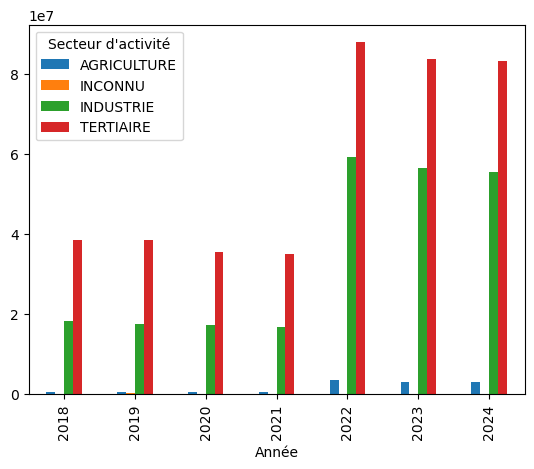

In [48]:
df.groupby(["Secteur d\'activité", "Année"])["Consommation annuelle totale de l\'adresse (MWh)"].sum().unstack("Secteur d'activité").plot(kind="bar")

In [35]:
df[df["Année"] < 2021]["NAF2"].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: NAF2, dtype: float64

In [42]:
print(sum(df[df["Année"] >= 2021]["NAF2"].isna()))
print(len(df[df["Année"] >= 2021]))

2054
1687245


In [46]:
df[df["Secteur d\'activité"] == "INCONNU"].sort_values("Consommation annuelle totale de l\'adresse (MWh)", ascending=False).head()

,Année,Code IRIS,Nom IRIS,Numéro de voie,Indice de répétition,Type de voie,Libellé de voie,Secteur d'activité,Catégorie de consommation,NAF2,Adresse,Code Commune,Nom Commune,Nombre de sites,Consommation annuelle totale de l'adresse (MWh),Code EPCI,Code Département,Code Région,Tri des adresses
667471,2019,882610000,Laval-sur-Vologne (commune non irisée),34,NaN,RUE,MAURICE MOUGEOT,INCONNU,ENT,NaN,34 RUE MAURICE MOUGEOT,88261,Laval-sur-Vologne,1,67093.884,200042000.0,88.0,44.0,493359
1737304,2019,060290124,Saint-Cassien-Bastide Rouge,100,NaN,BOULEVARD,DU MIDI LOUISE MOREAU,INCONNU,ENT,NaN,100 BOULEVARD DU MIDI LOUISE MOREAU,6029,Cannes,1,28369.511,200039915.0,6.0,93.0,449839
836994,2018,452342104,Activités,5,NaN,AVENUE,DE CONCYR,INCONNU,ENT,NaN,5 AVENUE DE CONCYR,45234,Orléans,1,23082.594,244500468.0,45.0,24.0,735153
136120,2019,765401006,Zone Portuaire Sud,25,NaN,QUAI,DE FRANCE,INCONNU,ENT,NaN,25 QUAI DE FRANCE,76540,Rouen,1,21076.031,200023414.0,76.0,28.0,574218
1261944,2019,611690102,Le Pont Feron,370,NaN,RUE,DE L AGRICULTURE,INCONNU,ENT,NaN,370 RUE DE L AGRICULTURE,61169,Flers,1,19858.423,200035814.0,61.0,28.0,474764


1. Papeterie des Vosges
2. Thalès Alenia Space ^^
3. Agence d'intérim / Delpharm (pharmaceutique)
4. Lubrizol France (usine chimique)
5. Charal

In [55]:
df.groupby("Année")["Secteur d\'activité"].describe()

,count,unique,top,freq
Année,,,,
2018,194914,4,TERTIAIRE,153503
2019,201636,4,TERTIAIRE,158346
2020,205501,4,TERTIAIRE,161915
2021,213527,4,TERTIAIRE,170044
2022,489839,4,TERTIAIRE,369696
2023,490883,4,TERTIAIRE,369696
2024,492996,4,TERTIAIRE,370684


In [57]:
df[df["Secteur d\'activité"] == "INCONNU"].groupby("Année")["Secteur d\'activité"].describe()

,count,unique,top,freq
Année,,,,
2018,29,1,INCONNU,29
2019,624,1,INCONNU,624
2020,409,1,INCONNU,409
2021,309,1,INCONNU,309
2022,591,1,INCONNU,591
2023,639,1,INCONNU,639
2024,515,1,INCONNU,515


In [60]:
df[df["Secteur d\'activité"] == "INCONNU"][df["Année"] == 2018].sort_values("Consommation annuelle totale de l\'adresse (MWh)", ascending=False)

/tmp/ipykernel_249844/3122839487.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["Secteur d\'activité"] == "INCONNU"][df["Année"] == 2018].sort_values("Consommation annuelle totale de l\'adresse (MWh)", ascending=False)


,Année,Code IRIS,Nom IRIS,Numéro de voie,Indice de répétition,Type de voie,Libellé de voie,Secteur d'activité,Catégorie de consommation,NAF2,Adresse,Code Commune,Nom Commune,Nombre de sites,Consommation annuelle totale de l'adresse (MWh),Code EPCI,Code Département,Code Région,Tri des adresses
836994,2018,452342104,Activités,5,NaN,AVENUE,DE CONCYR,INCONNU,ENT,NaN,5 AVENUE DE CONCYR,45234,Orléans,1,23082.594,244500468.0,45.0,24.0,735153
1427746,2018,751156010,Javel 10,9,NaN,RUE,CAUCHY,INCONNU,ENT,NaN,9 RUE CAUCHY,75056,Paris,1,7109.295,200054781.0,75.0,11.0,738871
1934630,2018,774950102,Centre Est,7,NaN,RUE,PAUL HENRI SPAAK,INCONNU,ENT,NaN,7 RUE PAUL HENRI SPAAK,77495,Vert-Saint-Denis,1,2031.357,200059228.0,77.0,11.0,805300
453678,2018,751166407,Chaillot 7,50,NaN,AVENUE,FOCH,INCONNU,ENT,NaN,50 AVENUE FOCH,75056,Paris,1,733.043,200054781.0,75.0,11.0,750477
2062506,2018,740101201,Taillefer-Le Levray-Les Romains,8,NaN,ROUTE,DE LA SALLE,INCONNU,ENT,NaN,8 ROUTE DE LA SALLE,74010,Annecy,1,252.884,200066793.0,74.0,84.0,625964
498832,2018,920780105,St-Exupery,7,NaN,SQUARE,GERARD PHILIPE,INCONNU,ENT,NaN,7 SQUARE GERARD PHILIPE,92078,Villeneuve-la-Garenne,1,122.841,200054781.0,92.0,11.0,808351
1029088,2018,402300000,Pontonx-sur-l'Adour (commune non irisée),206,NaN,AVENUE,DU MARENSIN,INCONNU,ENT,NaN,206 AVENUE DU MARENSIN,40230,Pontonx-sur-l'Adour,1,116.714,244000766.0,40.0,75.0,762437
2281566,2018,552280000,Hannonville-sous-les-Côtes (commune non irisée),14,NaN,RUE,DE LA PROMENADE,INCONNU,ENT,NaN,14 RUE DE LA PROMENADE,55228,Hannonville-sous-les-Côtes,1,109.912,245501176.0,55.0,44.0,682229
659198,2018,132130803,Le Clos,227,NaN,CHEMIN,ND DE LA CONSOLATION,INCONNU,ENT,NaN,227 CHEMIN ND DE LA CONSOLATION,13055,Marseille,1,97.200,200054807.0,13.0,93.0,713453
1483233,2018,751093609,Rochechouart 9,10,NaN,RUE,LALLIER,INCONNU,ENT,NaN,10 RUE LALLIER,75056,Paris,1,95.519,200054781.0,75.0,11.0,752362
